In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

- Mô hình CNN phân loại ảnh xe 2 bánh (bike) và xe 4 bánh (car):

In [2]:
classifier = Sequential()

classifier.add(Conv2D(filters = 32, kernel_size = 3, input_shape = (128, 128, 3),
                      activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [3]:
classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [4]:
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 9110 images belonging to 2 classes.
Found 2993 images belonging to 2 classes.


In [7]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3686528   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [8]:
import time
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10, min_delta = 0.001),
             ModelCheckpoint('model_checkpoint_cnn21.h5')]

t1 = time.time()
history = classifier.fit(training_set,
                         validation_data = test_set,
                         epochs = 100,
                         callbacks = callbacks)
t2 = time.time()
print('CNN training took {:.2f} minutes.'.format((t2 - t1) / 60))

Epoch 1/100
285/285 [==============================] - 122s 425ms/step - loss: 0.3460 - accuracy: 0.8483 - val_loss: 0.2435 - val_accuracy: 0.8974
Epoch 2/100
285/285 [==============================] - 114s 400ms/step - loss: 0.1770 - accuracy: 0.9317 - val_loss: 0.1366 - val_accuracy: 0.9469
Epoch 3/100
285/285 [==============================] - 114s 400ms/step - loss: 0.1537 - accuracy: 0.9422 - val_loss: 0.1461 - val_accuracy: 0.9499
Epoch 4/100
285/285 [==============================] - 115s 403ms/step - loss: 0.1298 - accuracy: 0.9492 - val_loss: 0.1432 - val_accuracy: 0.9442
Epoch 5/100
285/285 [==============================] - 115s 402ms/step - loss: 0.1188 - accuracy: 0.9537 - val_loss: 0.0987 - val_accuracy: 0.9642
Epoch 6/100
285/285 [==============================] - 114s 401ms/step - loss: 0.1065 - accuracy: 0.9589 - val_loss: 0.1149 - val_accuracy: 0.9586
Epoch 7/100
285/285 [==============================] - 114s 401ms/step - loss: 0.0938 - accuracy: 0.9645 - val_loss: 0

In [9]:
classifier.save('CNN_bike_car_model.h5')
print('Save !!!')

Save !!!


In [10]:
df_clf = pd.DataFrame(history.history)
df_clf.tail()

,loss,accuracy,val_loss,val_accuracy
18,0.027038,0.990560,0.074500,0.976612
19,0.025057,0.990779,0.176191,0.955229
20,0.022877,0.992097,0.074859,0.980621
21,0.025015,0.990889,0.123111,0.970598
22,0.022446,0.992206,0.062931,0.981290


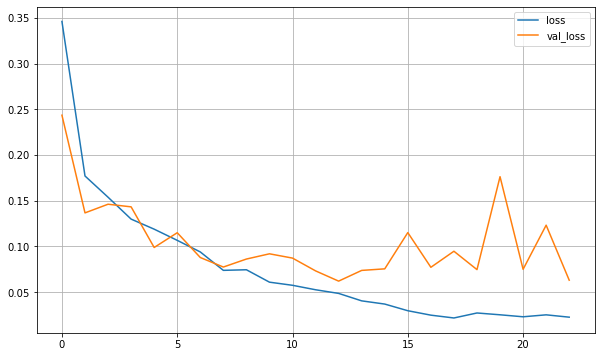

In [11]:
import matplotlib.pyplot as plt
df_clf.loc[:, ['loss', 'val_loss']].plot(figsize = (10, 6))
plt.grid(True);

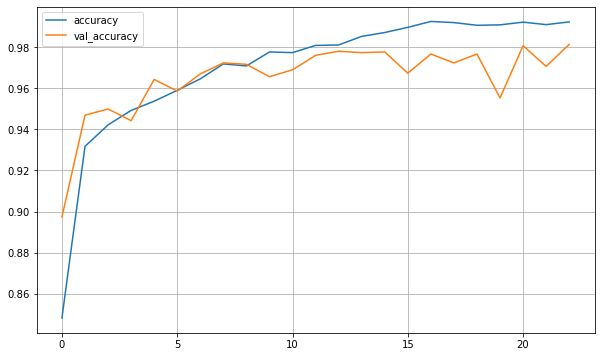

In [12]:
df_clf.loc[:, ['accuracy', 'val_accuracy']].plot(figsize = (10, 6))
plt.grid(True);